In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
sns.set_context('talk')

In [2]:
# Number of events
N = 10**6

# Time window
W = 1

# Maximum time delay
T = 1000

In [3]:
# Number of settings of the first modulator
N_phis = 5+4*7
phis = np.linspace(0, 2*np.pi, N_phis)

# Arrays to store the results
correlations_coinc = np.zeros(N_phis)
E_1_coinc = np.zeros(N_phis)
E_2_coinc = np.zeros(N_phis)

correlations_no_coinc = np.zeros(N_phis)
E_1_no_coinc = np.zeros(N_phis)
E_2_no_coinc = np.zeros(N_phis)

# Fixed setting for the second modulator
theta_2 = 0

# Loop over the different settings of the first modulator
for i, theta_1 in enumerate(phis):

    # Random polarizations of the photons
    xi_n = np.random.uniform(0, 2*np.pi, N)
    
    # Rotations by electro-optic modulators
    alpha_n1 = xi_n - theta_1
    alpha_n2 = xi_n - theta_2 + np.pi/2

    # Measurement by polarizing beam splitter 1
    r_n1 = np.random.uniform(0, 1, N)
    x_n1 = np.ones(N)
    x_n1[r_n1 > np.cos(alpha_n1)**2] = -1

    # Measurement by polarizing beam splitter 2
    r_n2 = np.random.uniform(0, 1, N)
    x_n2 = np.ones(N)
    x_n2[r_n2 > np.cos(alpha_n2)**2] = -1

    # Time delay for both photons by retardation properties of wave plates
    t_n1 = T*np.random.uniform(0, 1, N)*np.sin(2*alpha_n1)**4
    t_n2 = T*np.random.uniform(0, 1, N)*np.sin(2*alpha_n2)**4

    # Correlations with coincidence window
    mask_coincidence = np.abs(t_n1 - t_n2) < W
    correlations_coinc[i] = np.mean(x_n1[mask_coincidence]*x_n2[mask_coincidence])

    # Correlations without coincidence window
    correlations_no_coinc[i] = np.mean(x_n1*x_n2)

    # Expectation values with coincidence window
    E_1_coinc[i] = np.mean(x_n1[mask_coincidence])
    E_2_coinc[i] = np.mean(x_n2[mask_coincidence])

    # Expectation values without coincidence window
    E_1_no_coinc[i] = np.mean(x_n1)
    E_2_no_coinc[i] = np.mean(x_n2)

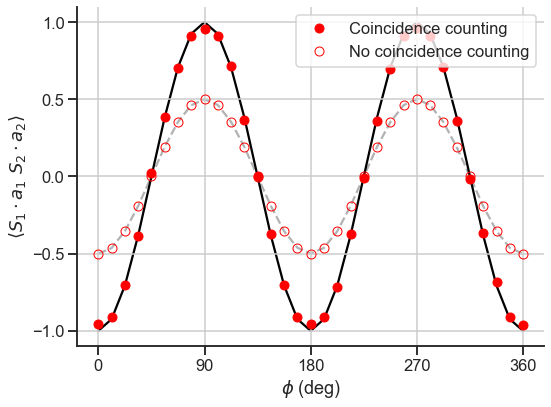

In [4]:
# Plot correlations with and without coincidence counting

rad2deg = 180/np.pi

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(phis * rad2deg, correlations_coinc, color="red", marker="o", linestyle="none", label="Coincidence counting")
ax.plot(phis * rad2deg, -np.cos(2*phis), color="black", linestyle="-", zorder=-1)

phi_array = np.linspace(0, 2*np.pi, 100)

ax.plot(phis * rad2deg, correlations_no_coinc, color="red", marker="o", fillstyle="none", linestyle="none", label="No coincidence counting")
ax.plot(phis * rad2deg, correlations_no_coinc, color="black", linestyle="--", zorder=-1, alpha=0.3)

ax.set_xlabel(r"$\phi$ (deg)")
ax.set_ylabel(r"$\langle S_1 \cdot a_1 \ S_2 \cdot a_2 \rangle$")

ax.set_ylim(-1.1, 1.1)

ax.set_xticks(np.linspace(0, 360, 5))
ax.set_yticks(np.linspace(-1, 1, 5))
ax.grid()

plt.legend(loc="upper right")

plt.tight_layout()
sns.despine()
plt.show()

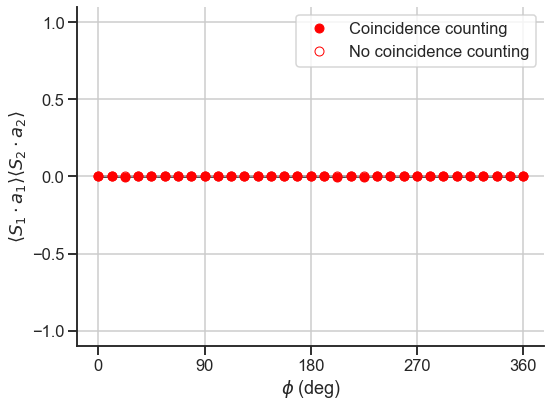

In [5]:
# Plot expectation values with and without coincidence counting

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(phis * rad2deg, E_1_coinc*E_2_coinc, color="red", marker="o", linestyle="none", label="Coincidence counting")
ax.plot(phis * rad2deg, E_1_coinc*E_2_coinc, color="black", linestyle="-", zorder=-1)
ax.plot(phis * rad2deg, E_1_no_coinc*E_2_no_coinc, marker="o", color="red", fillstyle="none", linestyle="none", label="No coincidence counting")
ax.plot(phis * rad2deg, E_1_no_coinc*E_2_no_coinc, color="black", linestyle="--", zorder=-1, alpha=0.3)

ax.set_xlabel(r"$\phi$ (deg)")
ax.set_ylabel(r"$\langle S_1 \cdot a_1 \rangle \langle S_2 \cdot a_2 \rangle$")

ax.set_ylim(-1.1, 1.1)

ax.set_xticks(np.linspace(0, 360, 5))
ax.set_yticks(np.linspace(-1, 1, 5))
ax.grid()

plt.legend(loc="upper right")

plt.tight_layout()
sns.despine()
plt.show()